# Anomaly Detection Using KDDCUP data

## Importing libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

## Data Preparation

### Loading and preprocessing

In [56]:
df = pd.read_csv('../data/kddcup.data_10_percent_corrected',header=None)

In [57]:
categorical_features = [1,2,3]
numerical_features = list(set(df.columns) - set(categorical_features) - {41})

### Encoding categorical features

In [58]:
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(df[categorical_features]).toarray()
df[41] = df[41].apply(lambda x: 0 if x.strip() == 'normal.' else 1)

### Normalizing numerical columns

In [59]:
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(df[numerical_features])

In [60]:
X = np.hstack((numerical_scaled,categorical_encoded))
y = df[41].values

## Dimensionality reduction

In [61]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

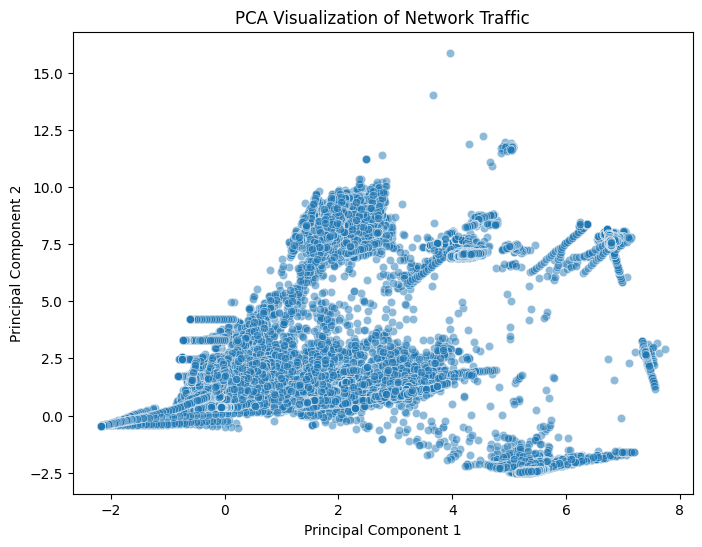

In [62]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],alpha=0.5)
plt.title("PCA Visualization of Network Traffic")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


## Model Development

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=df[41])

In [64]:
model = IsolationForest(contamination=0.1,random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

### Evaluation

In [65]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred == 1,0,1)

In [66]:
print("Classification Report : \n")
print(classification_report(y_test,y_pred))

Classification Report : 

              precision    recall  f1-score   support

           0       0.16      0.75      0.27     29184
           1       0.50      0.06      0.11    119023

    accuracy                           0.20    148207
   macro avg       0.33      0.41      0.19    148207
weighted avg       0.44      0.20      0.14    148207



Confusion Matrix


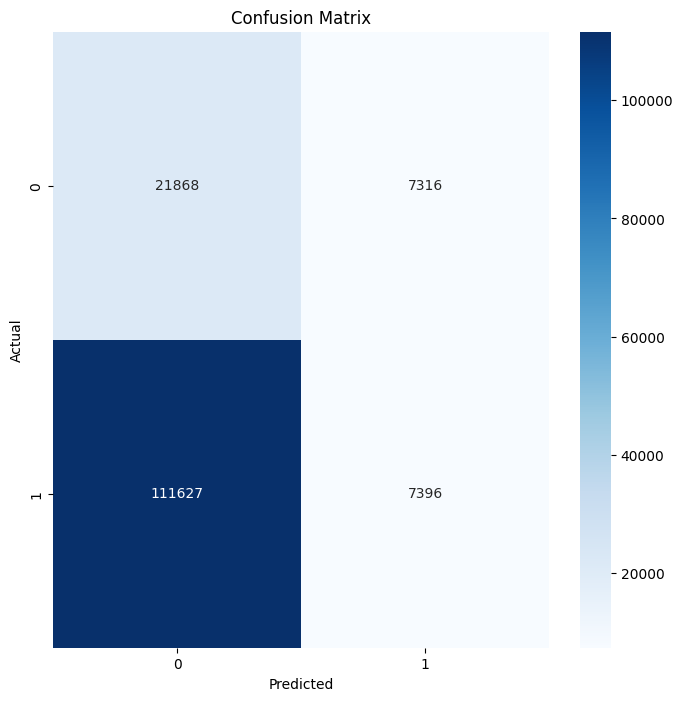

In [67]:
print("Confusion Matrix")
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [68]:
print("ROC values : ")
print(roc_auc_score(y_test,y_pred))

ROC values : 
0.40572697168971905


## Visualizations

In [70]:
X_pca_test = pca.fit_transform(X_test)

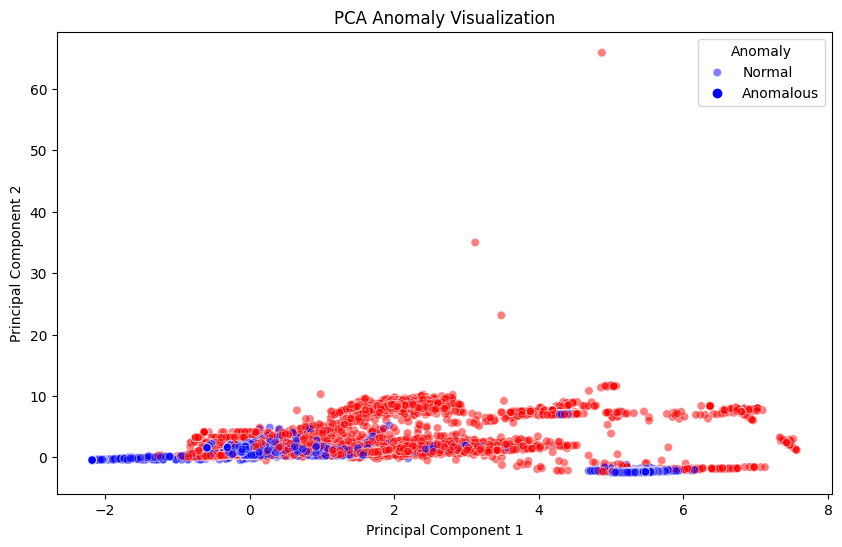

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca_test[:,0],y=X_pca_test[:,1],hue=y_pred,palette = ['blue','red'],alpha=0.5)
plt.title("PCA Anomaly Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Anomaly', labels=['Normal', 'Anomalous'])
plt.show()